# background

transformers are a type of deep learning model architecture that has revolutionized natural language processing (NLP) and various other domains. Introduced in the 2017 paper "Attention Is All You Need" by Vaswani et al., transformers have become the foundation for many state-of-the-art models in NLP and beyond.

imp components of tranformer : 

1. self-attention : allows the model to weigh the importance of different parts of the input when processing each element.

2. parallelization: unlike recurrent neural networks (RNNs), transformers can process all input elements simultaneously, leading to faster training and inference.

3. positional encoding: it helps the model to understand the order of input elements without using recurrence.(there has been little update here like ROPE(rotary positional encoding))

4. encoder-decoder architecture: suitable for various tasks, including machine translation, text summarization, and more.

5. scalability: transformers can be scaled to very large models with billions of parameters, leading to impressive performance on many tasks.

early SOTA model based on transfomer : 
- BERT (Bidirectional Encoder Representations from Transformers)
- GPT (Generative Pre-trained Transformer) series
- T5 (Text-to-Text Transfer Transformer)

these models have achieved state-of-the-art results in various NLP tasks and have been adapted for use in other domains like computer vision and speech processing.(with some samll chnages in arch)



# transformer architecture: detailed explanation


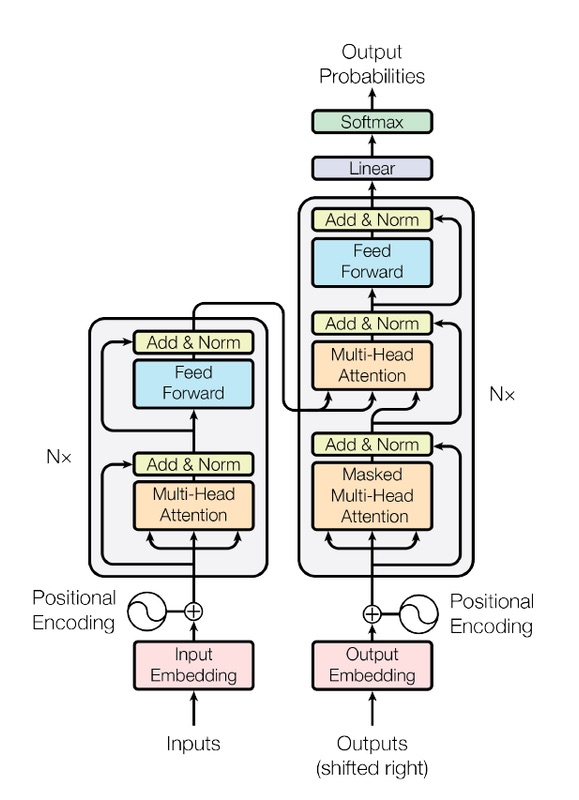

## 1. input embedding

the first step in a transformer is to convert input tokens into continuous vector representations.

**formula:**
$E = WX$

Where:
- $E$ is the embedding matrix
- $W$ is the weight matrix
- $X$ is the one-hot encoded input

**explanation:** 


In [ ]:
#